In [60]:
import numpy as np
import math as mt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [61]:
df = pd.read_csv('crops.csv')
df.rename(columns={'N':'nitrogen', 'P':'phosphorus','K':'potassium'},inplace=True)
df.head()

,nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [62]:
df.isnull().sum()

nitrogen       0
phosphorus     0
potassium      0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [63]:
df.columns

Index(['nitrogen', 'phosphorus', 'potassium', 'temperature', 'humidity', 'ph',
       'rainfall', 'label'],
      dtype='object')

In [64]:
x = df.drop('label',axis='columns')
x

,nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [65]:
y= df['label']
y

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

In [66]:
model = LogisticRegression()
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size = 0.2, random_state=0)

In [67]:
model.fit(X_train,Y_train)


/Users/raghavsenthilkumar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [68]:
y_predict = model.predict(X_test)
y_predict

array(['watermelon', 'watermelon', 'grapes', 'chickpea', 'blackgram',
       'jute', 'mothbeans', 'kidneybeans', 'muskmelon', 'banana',
       'mothbeans', 'coffee', 'lentil', 'mungbean', 'mango', 'apple',
       'coffee', 'lentil', 'coffee', 'mango', 'coconut', 'blackgram',
       'kidneybeans', 'jute', 'cotton', 'coffee', 'lentil', 'orange',
       'mothbeans', 'kidneybeans', 'pomegranate', 'rice', 'maize',
       'muskmelon', 'coconut', 'cotton', 'mango', 'mango', 'watermelon',
       'mothbeans', 'maize', 'blackgram', 'pigeonpeas', 'watermelon',
       'pigeonpeas', 'mungbean', 'kidneybeans', 'kidneybeans', 'cotton',
       'mungbean', 'mothbeans', 'blackgram', 'apple', 'muskmelon',
       'pigeonpeas', 'banana', 'papaya', 'mango', 'lentil', 'cotton',
       'orange', 'mungbean', 'watermelon', 'rice', 'muskmelon', 'apple',
       'grapes', 'coffee', 'apple', 'orange', 'coconut', 'pomegranate',
       'kidneybeans', 'maize', 'grapes', 'mothbeans', 'chickpea', 'maize',
       'jute',

Text(0.5, 1.0, 'Confusion Matrix: LG Model')

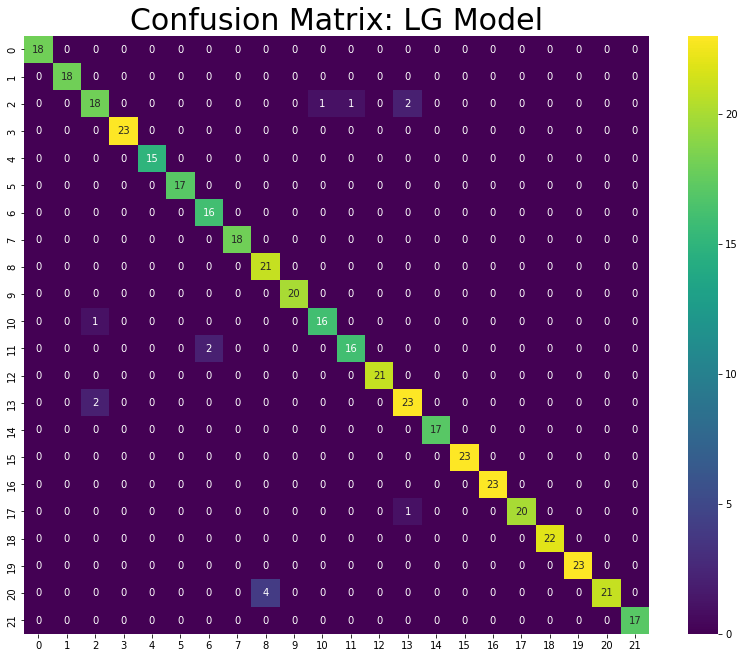

In [69]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_test,y_predict)
ax = plt.subplots(figsize=(14,11))
sns.heatmap(cm,annot=True, cmap='viridis')
plt.title("Confusion Matrix: LG Model",fontsize = 30)

In [70]:
k = model.score(X_test, Y_test) *100
print('Accuracy of Model: '+ str(k)+'%')

Accuracy of Model: 96.81818181818181%


In [71]:
lr = LinearRegression() 
dummy = pd.get_dummies(df['label'])
dummy = dummy.drop(['apple'],axis='columns')
dummy

,banana,blackgram,chickpea,coconut,coffee,cotton,grapes,jute,kidneybeans,lentil,...,mango,mothbeans,mungbean,muskmelon,orange,papaya,pigeonpeas,pomegranate,rice,watermelon
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2196,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2197,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2198,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
var= df.drop('label', axis='columns')
var

,nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [73]:
X_train, X_test, Y_train, Y_tests = train_test_split(var,dummy,test_size = 0.2, random_state=0)

In [74]:
lr.fit(X_train,Y_train)
y_pred = lr.predict(X_test)
print(str(lr.score(X_test,Y_tests)*100) + '%')

23.435753816396147%


In [75]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_jobs=2, random_state=0)

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size = 0.2, random_state=0)

In [77]:
clf.fit(X_train, Y_train)

RandomForestClassifier(n_jobs=2, random_state=0)

In [78]:
y_pred = clf.predict(X_test)

Text(0.5, 1.0, 'Confusion Matrix: RandomForestClassifier Model')

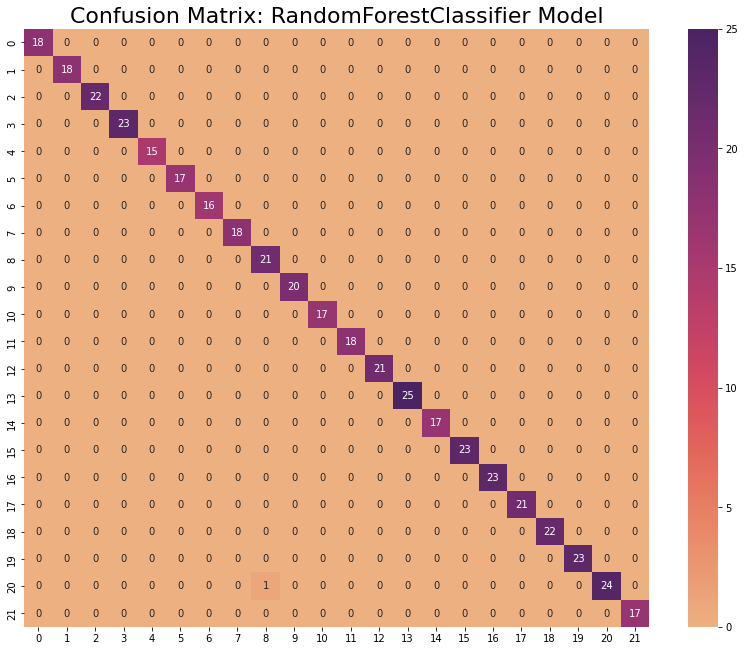

In [79]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_test,y_pred)
ax = plt.subplots(figsize=(14,11))
sns.heatmap(cm,annot=True, cmap='flare')
plt.title("Confusion Matrix: RandomForestClassifier Model",fontsize = 22)

In [80]:
print(str(clf.score(X_test,Y_test)*100) + '%')

99.77272727272727%


In [81]:
label = df['label'] 
typesofcrop=dummy.columns
l = df.columns.drop('label')

In [82]:
def divide(arr, lab):
    i=-1
    temp=[]
    l
    for item in arr:
        i= i+1
        if(item==lab):
            j = df.iloc[i]
            temp.append(j)
    return temp
            
    

In [83]:
def range(arr, strl):
    n=[]
    for i in arr:
        n.append(i[strl])
    return [np.min(n),np.max(n)]

In [84]:
def all(arr, arr2):
    te=-1
    temperary =[]
    for i in arr2:
        te = te+1
        temperary.append(range(arr,arr2[te]))
    return temperary

In [85]:
rice = divide(label,'rice')
maize = divide(label,'maize')
chickpea = divide(label,'chickpea')
kidneybeans = divide(label,'kidneybeans')
pigeonpeas = divide(label,'pigeonpeas')
mothbeans = divide(label,'mothbeans')
mungbean = divide(label,'mungbean')
blackgram = divide(label,'blackgram')
lentil = divide(label,'lentil')
pomegranate = divide(label,'pomegranate')
banana = divide(label,'banana')
mango = divide(label,'mango')
grapes = divide(label,'grapes')
watermelon = divide(label,'watermelon')
muskmelon = divide(label,'muskmelon')
apple = divide(label,'apple')
orange = divide(label,'orange')
papaya = divide(label,'papaya')
coconut = divide(label,'coconut')
jute = divide(label,'jute')
coffee = divide(label,'coffee')

In [86]:
for i in l:
    print("Range of " + str(i)+ " for Rice: "+ str(range(rice,i)))
    print("Range of " + str(i)+ " for Maize: "+ str(range(maize,i)))
    print("Range of " + str(i)+ " for Chickpea: "+ str(range(chickpea,i)))
    print("Range of " + str(i)+ " for Kidneybeans: "+ str(range(kidneybeans,i)))
    print("Range of " + str(i)+ " for PigeonPeas: "+ str(range(pigeonpeas,i)))
    print("Range of " + str(i)+ " for MothBeans: "+ str(range(mothbeans,i)))
    print("Range of " + str(i)+ " for Mungbean: "+ str(range(mungbean,i)))
    print("Range of " + str(i)+ " for Blackgram: "+ str(range(blackgram,i)))
    print("Range of " + str(i)+ " for Lentil: "+ str(range(lentil,i)))
    print("Range of " + str(i)+ " for Pomegranate: "+ str(range(pomegranate,i)))
    print("Range of " + str(i)+ " for Banana: "+ str(range(banana,i)))
    print("Range of " + str(i)+ " for Mango: "+ str(range(mango,i)))
    print("Range of " + str(i)+ " for Grapes: "+ str(range(grapes,i)))
    print("Range of " + str(i)+ " for Watermelon: "+ str(range(watermelon,i)))
    print("Range of " + str(i)+ " for Muskmelon: "+ str(range(muskmelon,i)))
    print("Range of " + str(i)+ " for Apple: "+ str(range(apple,i)))
    print("Range of " + str(i)+ " for Orange: "+ str(range(orange,i)))
    print("Range of " + str(i)+ " for Papaya: "+ str(range(papaya,i)))
    print("Range of " + str(i)+ " for Jute: "+ str(range(jute,i)))
    print("Range of " + str(i)+ " for coffee: "+ str(range(coffee,i)))
    
    
    print()

Range of nitrogen for Rice: [60, 99]
Range of nitrogen for Maize: [60, 100]
Range of nitrogen for Chickpea: [20, 60]
Range of nitrogen for Kidneybeans: [0, 40]
Range of nitrogen for PigeonPeas: [0, 40]
Range of nitrogen for MothBeans: [0, 40]
Range of nitrogen for Mungbean: [0, 40]
Range of nitrogen for Blackgram: [20, 60]
Range of nitrogen for Lentil: [0, 40]
Range of nitrogen for Pomegranate: [0, 40]
Range of nitrogen for Banana: [80, 120]
Range of nitrogen for Mango: [0, 40]
Range of nitrogen for Grapes: [0, 40]
Range of nitrogen for Watermelon: [80, 120]
Range of nitrogen for Muskmelon: [80, 120]
Range of nitrogen for Apple: [0, 40]
Range of nitrogen for Orange: [0, 40]
Range of nitrogen for Papaya: [31, 70]
Range of nitrogen for Jute: [60, 100]
Range of nitrogen for coffee: [80, 120]

Range of phosphorus for Rice: [35, 60]
Range of phosphorus for Maize: [35, 60]
Range of phosphorus for Chickpea: [55, 80]
Range of phosphorus for Kidneybeans: [55, 80]
Range of phosphorus for PigeonP

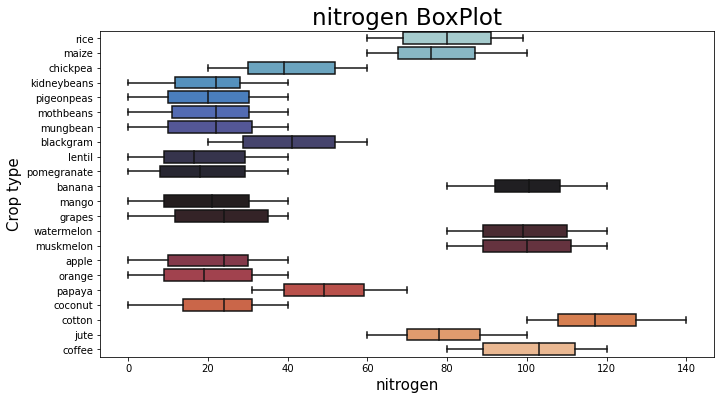

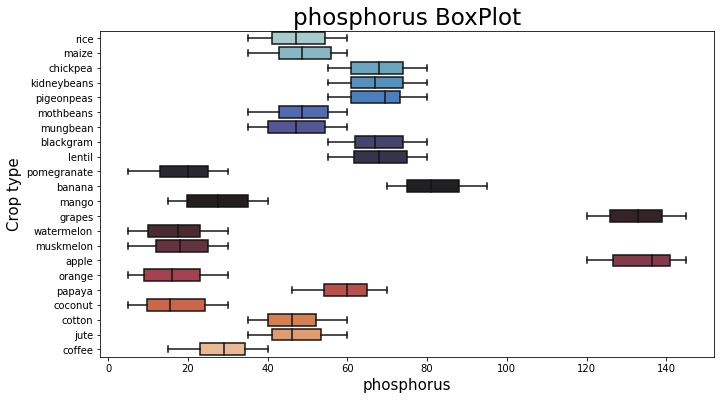

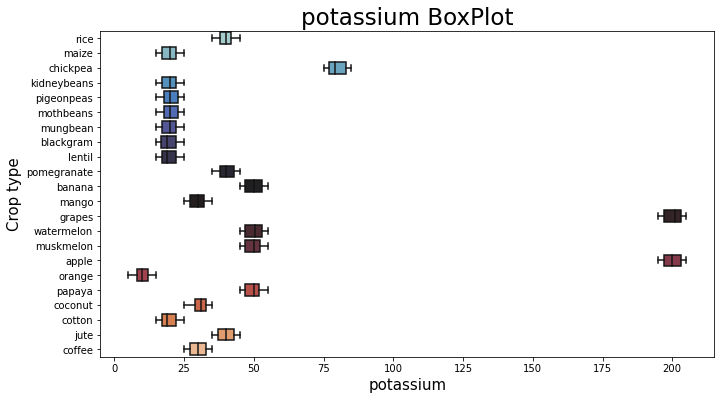

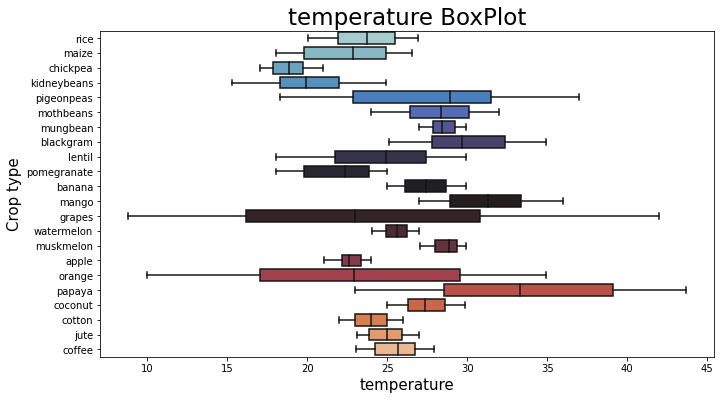

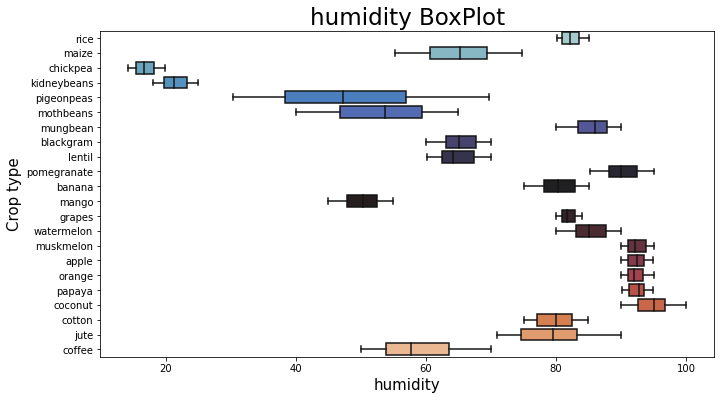

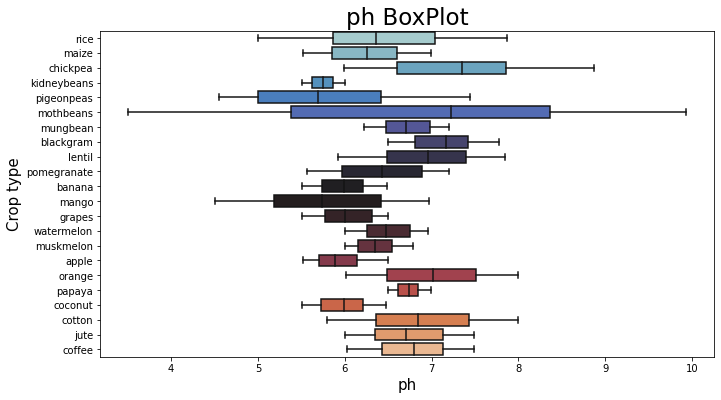

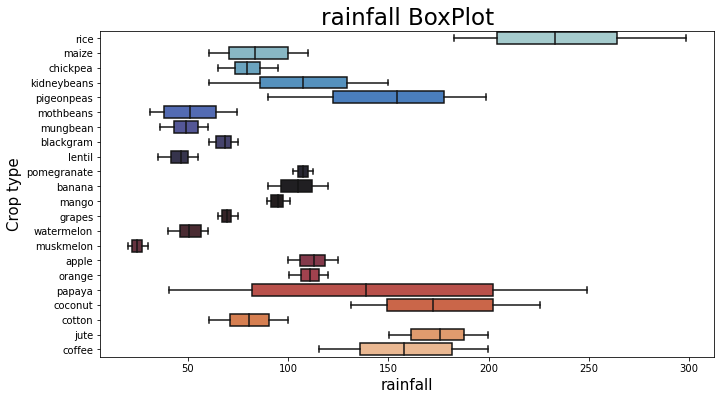

In [87]:
for i in x.columns:
    ax = plt.subplots(figsize=(11,6))
    ax = sns.boxplot(x=str(i),y='label', data=df, palette = "icefire")
    plt.title(str(i)+ " BoxPlot", fontsize=23)
    ax.set_xlabel(str(i), fontsize=15)
    ax.set_ylabel('Crop type', fontsize=15)

In [88]:
NSTD = np.array(df['nitrogen']).reshape(-1,1).std()
NMEAN =np.array(df['nitrogen']).reshape(-1,1).mean()
PSTD = np.array(df['phosphorus']).reshape(-1,1).std()
PMEAN = np.array(df['phosphorus']).reshape(-1,1).mean()
KSTD = np.array(df['potassium']).reshape(-1,1).std()
KMEAN =np.array(df['potassium']).reshape(-1,1).mean()
TSTD =np.array(df['temperature']).reshape(-1,1).std()
TMEAN = np.array(df['temperature']).reshape(-1,1).mean()
HSTD =np.array(df['humidity']).reshape(-1,1).std()
HMEAN = np.array(df['humidity']).reshape(-1,1).mean()
PSTD =np.array(df['ph']).reshape(-1,1).std()
PMEAN = np.array(df['ph']).reshape(-1,1).mean()
RSTD =np.array(df['rainfall']).reshape(-1,1).std()
RMEAN = np.array(df['rainfall']).reshape(-1,1).mean()

In [89]:
for i in x.columns:
    print(i + ":")
    print('Standard deviation: ' + str(mt.ceil(np.array(df[i]).reshape(-1,1).std())))
    print("Mean:"+ str(mt.ceil(np.array(df[i]).reshape(-1,1).mean())))
    print()

nitrogen:
Standard deviation: 37
Mean:51

phosphorus:
Standard deviation: 33
Mean:54

potassium:
Standard deviation: 51
Mean:49

temperature:
Standard deviation: 6
Mean:26

humidity:
Standard deviation: 23
Mean:72

ph:
Standard deviation: 1
Mean:7

rainfall:
Standard deviation: 55
Mean:104



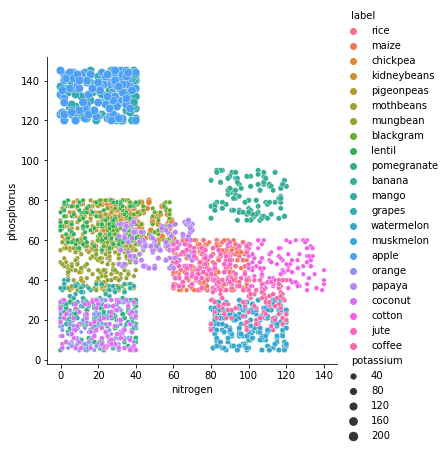

In [90]:
b =sns.relplot(data=df, x='nitrogen', y='phosphorus', hue='label', size='potassium')

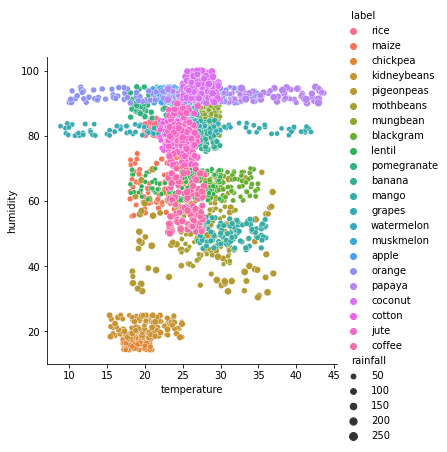

In [91]:
ax=sns.relplot(data=df, x='temperature', y='humidity', hue='label', size='rainfall')